## Setup

In [40]:
import numpy as np
import pandas as pd
import cv2
import os
import random
import h5py
import matplotlib.pyplot as plt

# import sys
# sys.path.append('/Users/konstantinoskalaitzidis/Developer/dmc/my-gitlab-konkalaitzidis/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks')
# import arrowmaze_project.utils.readSessionsServer as readSessionServer

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

NOTE: All dependencies are within a conda environment to ensure reproducibility. To install all dependencies: pip install -r requirements.txt

In [2]:
# Connect with dmcdb

In [3]:
# mySession = readSessionServer.SessionIterator()
# sess = mySession.findSession()
# # for sess in mySession.findSessions():
# #     print(sess)
# if sess.hasBehavior() and sess.hasCalcium():
#     behavior = sess.getBehaviorSegmentation(align_with_calcium=True).reset_index()

## Define hyperparameters

In [4]:
# IMG_SIZE = 224
# BATCH_SIZE = 64
# EPOCHS = 10

# MAX_SEQ_LENGTH = 20
# NUM_FEATURES = 2048

In [5]:
# import sys
# sys.path.append("/Users/konstantinoskalaitzidis/Developer/dmc")
# from readSessionsServer import SessionIterator

#TODO: Script to retrieve videos from a list of calcium videos (of the same animal) from the db

## Data preparation and feature engineering

Extract frames from the calcium imaging video and save to directory. Each frame contains spatial information, and the sequence of those frames contains temporal information. Maybe also ask for path input from the user to make it reproducible

helpful source: https://keras.io/examples/vision/video_classification/

Not going to be used for now but this will allow us to have an overview of all the videos I have available to train my CNN model. I expect to have all recordings sessions for each animal as a CNN is going to be trained only based on recordings from the corresponding animal. 

In [6]:
# train_df = pd.read_csv("train.csv")
# test_df = pd.read_csv("test.csv")

# print(f"Total videos for training: {len(train_df)}")
# print(f"Total videos for testing: {len(test_df)}")

# train_df.sample(10)

The duration of each frame depends on the frame rate of the video. If a video has a frame rate of 25 fps, then each frame will have a duration of 1/25th of a second, or approximately 0.04 seconds.

-> Here

In [7]:
# Fetch all calcium videos from the dmc database and align calcium videos with behavior annotations
# mySession = readSessionServer.SessionIterator()
# for sess in mySession.findSessions():
#     print(sess)
    # if sess.hasBehavior() and sess.hasCalcium():
        # behavior = sess.getBehaviorSegmentation(align_with_calcium=True).reset_index()

In [8]:
# Raw calcium imaging video path of animal 1 learning day 1
#For accessing the file in a folder contained in the current folder

In [9]:
# Open the HDF5 file
with h5py.File('/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/20211016_163921_animal1learnday1.nwb', 'r') as f:
    # Print the keys of the file
    print(list(f.keys()))
    # dataset = f['identifier'][()]
    # print(dataset)

['acquisition', 'analysis', 'epochs', 'file_create_date', 'general', 'identifier', 'nwb_version', 'processing', 'session_description', 'session_start_time', 'stimulus']


In [10]:
# Directory where frames from video will be stored after extraction
frames_dir = "/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/CI_video_frames/video_1"

-> Here

The number of frames may differ from video to video.
The frame rate may also differ from video to video but it should be 20fps for all. 

In [11]:
# Open the video using OpenCV and count the number of frames
# cap = cv2.VideoCapture(raw_calcium_video_path)
# frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# cap.release()

# print(f"Number of frames in the video: {frame_count}")

In [12]:
# try to open other videos for test and frame rate and number of frames

In [13]:
# video = '/Users/konstantinoskalaitzidis/Desktop/realshort.mp4'

# cap = cv2.VideoCapture(video)
# frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# cap.release()

# print(f"Number of frames in the video: {frame_count}")

In [14]:
# Open the video file
# cap = cv2.VideoCapture(video)

# # Get the frame rate of the video
# frame_rate = int(cap.get(cv2.CAP_PROP_FPS))

# # Release the video capture object
# cap.release()

# print(f"Frame rate of the video: {frame_rate}")

In [15]:
# save each frame as one image

In [16]:
# cap = cv2.VideoCapture(video)

# # Loop through the video frames and save each one as an image file
# frame_count = 0
# while(cap.isOpened()):
#     ret, frame = cap.read()
#     if ret == False:
#         break
#     # Save the frame as an image file
#     frame_file = os.path.join(frames_dir, "frame_" + str(frame_count) + ".jpg")
#     cv2.imwrite(frame_file, frame)
#     frame_count += 1

# # Close the video file
# cap.release()

### Align behavior annotation with calcium video frames

At some point I will also have to align behavior and calcium imaging file and use those as input instead

In [17]:
# # define paths
# video_path = '/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/20211016_163921_animal1learnday1.nwb'
# train_dir = '/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/train'
# test_dir = '/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/test'

# # define train-test split ratio
# train_test_ratio = 0.8

# # open video file
# cap = cv2.VideoCapture(video_path)

# # get video frame count
# frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# # create list of frame indices
# frame_indices = list(range(frame_count))

# # shuffle frame indices
# random.shuffle(frame_indices)

# # split frame indices into train and test sets
# train_frame_indices = frame_indices[:int(frame_count * train_test_ratio)]
# test_frame_indices = frame_indices[int(frame_count * train_test_ratio):]

# # iterate over frames and save to train or test directory
# for i in range(frame_count):
#     # read frame
#     ret, frame = cap.read()
#     if not ret:
#         break
    
#     # save frame to train or test directory
#     if i in train_frame_indices:
#         cv2.imwrite(os.path.join(train_dir, f'{i}.jpg'), frame)
#     else:
#         cv2.imwrite(os.path.join(test_dir, f'{i}.jpg'), frame)

Loading Calcium Video

In [18]:
# Load the data from the .nwb file
with h5py.File('/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/20211016_163921_animal1learnday1.nwb', 'r') as f:
    video_data = np.array(f['analysis/recording_20211016_163921-PP-BP-MC/data'])

In [19]:
# Determine the size of the dataset
num_samples = video_data.shape[0]
num_samples

24186

In [20]:
video_data.shape

(24186, 349, 374)

Loading the behavior segmentation

In [24]:
with h5py.File('/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/20211016_163921_animal1learnday1.h5', 'r') as f:
    print(list(f.keys()))
    behavior_data = np.array(f['per_frame'])

['per_frame', 'per_segment']


In [22]:
behavior_data

array(['axis0', 'axis1', 'block0_items', 'block0_values', 'block1_items',
       'block1_values', 'block2_items', 'block2_values'], dtype='<U13')

Loading the bonsai data 

In [25]:
# Preparing bonsai data file
bonsai_data_path = input("Insert path of behavioral data file here: ")
bonsai_data = pd.read_csv(bonsai_data_path, header=None)


# Adding column names
bonsai_data = bonsai_data.rename(columns={
    0: 'Time', 1: 'Trial_Number',
    2: 'Reward', 3: 'Frame_Number', 4: 'Central_Zone',
    5: 'L_Zone', 6: 'R_Zone', 7: 'Calcium_frame'})

bonsai_data.head()

Insert path of behavioral data file here:  /Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/tmaze_2021-10-16T16_39_14.csv


,Time,Trial_Number,Reward,Frame_Number,Central_Zone,L_Zone,R_Zone,Calcium_frame
0,2021-10-16T16:39:15.7780992+02:00,0,0,0,False,False,False,0
1,2021-10-16T16:39:15.7956992+02:00,0,0,1,False,False,False,0
2,2021-10-16T16:39:15.8109568+02:00,0,0,2,False,False,False,0
3,2021-10-16T16:39:15.8277632+02:00,0,0,3,False,False,False,0
4,2021-10-16T16:39:15.8442752+02:00,0,0,4,False,False,False,0


Loading the behavior segmentation file

In [37]:
df_behavior = pd.read_hdf('/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/20211016_163921_animal1learnday1.h5', 'per_frame')
df_behavior.head()

# align the calcium frame column from the bonsai file with the behavior file
df_behavior = df_behavior.loc[bonsai_data.groupby('Calcium_frame').first()[1:].Frame_Number].reset_index()
df_behavior

,index,frame_no,segment_no,state_id,spatial_progress,temporal_progress,state_name
0,1518,1518,15,23,0.865004,0.953488,rightRight
1,1521,1521,15,23,0.909601,0.988372,rightRight
2,1524,1524,16,20,0.388515,0.014925,rightReturn
3,1527,1527,16,20,0.398498,0.037313,rightReturn
4,1530,1530,16,20,0.414232,0.059701,rightReturn
...,...,...,...,...,...,...,...
24181,74075,74075,271,0,0.333333,0.333333,initReward
24182,74078,74078,271,0,0.342593,0.342593,initReward
24183,74081,74081,271,0,0.351852,0.351852,initReward
24184,74084,74084,271,0,0.361111,0.361111,initReward


In [29]:
# Now, for each calcium video frame, I want to give the state_id value annotation. 

In [41]:
train_images = video_data
train_labels = df_behavior['state_id']

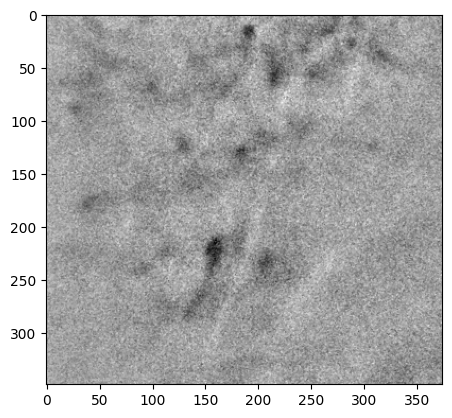

23


In [42]:
# Display the first image in the training set
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

# Print the label for the first image in the training set
print(train_labels[0])


We have 24186 images of dimensions 349x374 and the number 1 demonstrates that images are grayscale.

In [43]:
train_images = video_data.reshape(24186, 349, 374, 1)
#train_labels = df_behavior['state_id']

In [44]:
# ensuring that the pixel values are float numbers. This is a common preprocessing step for image data
train_images = train_images.astype('float32')

In [74]:
# How many distinct behaviors do we have?
no_of_behaviors = len(df_behavior['state_id'].unique())
no_of_behaviors

26

In [ ]:
arr = np.array([3, 2, 0, 1])

print(np.sort(arr))

In [70]:
no_of_behaviors

array([23, 20, 11, 12,  8,  5,  0,  2,  4, 19, 21, 24,  6, 13, 15, 17, 14,
        9, 25,  3,  7, 16,  1, 10, 22, 18])

In [45]:
from keras.utils import to_categorical

In [76]:
# Converting labels to categorical.
train_labels = to_categorical(train_labels, no_of_behaviors)

## Build the model

In [75]:
model = Sequential()

2023-03-20 17:23:55.785207: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [78]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(349, 374, 1))) # input is a 28x28 image with 1 color channel.

In [79]:
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a convolutional layer with 64 filters, a kernel size of 3x3, and a ReLU activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add a max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the previous layers
model.add(Flatten())

In [80]:
model.add(Dense(128, activation='relu'))

In [81]:
model.add(Dense(26, activation='softmax'))

## Train the model

In [82]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
756/756 [==============================] - 1106s 1s/step - loss: 36.3027 - accuracy: 0.2248
Epoch 2/10
756/756 [==============================] - 1117s 1s/step - loss: 2.5298 - accuracy: 0.2443
Epoch 3/10
756/756 [==============================] - 1143s 2s/step - loss: 2.5298 - accuracy: 0.2443
Epoch 4/10
756/756 [==============================] - 1086s 1s/step - loss: 2.5298 - accuracy: 0.2443
Epoch 5/10
756/756 [==============================] - 1079s 1s/step - loss: 2.5297 - accuracy: 0.2443
Epoch 6/10
756/756 [==============================] - 6038s 8s/step - loss: 2.5297 - accuracy: 0.2443
Epoch 7/10
756/756 [==============================] - 7777s 10s/step - loss: 2.5299 - accuracy: 0.2443
Epoch 8/10
756/756 [==============================] - 9572s 13s/step - loss: 2.5297 - accuracy: 0.2443
Epoch 9/10
756/756 [==============================] - 8443s 11s/step - loss: 2.5298 - accuracy: 0.2443
Epoch 10/10
756/756 [==============================] - 7505s 10s/step - loss: 

In [ ]:
import tensorflow as tf

# Define the CNN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load the training data
(train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)


## Prepare the data

Don't test. Just train the model

In [27]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(video_data, test_size=0.2, random_state=42)

# Optional: If you have corresponding labels for the data, split them as well
with h5py.File('path/to/labels.nwb', 'r') as f:
    labels = np.array(f['labels'])

y_train, y_test = train_test_split(labels, test_size=0.2, random_state=42)